In [3]:
import pandas as pd

# Load the Excel file (go one folder up, then into data/)
df = pd.read_excel('../data/Superstore.xlsx.xlsx')

# Show the first 5 rows
df.head()


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [7]:
df.isnull().sum()


Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [8]:
# Show only columns where null values exist
df.isnull().sum()[df.isnull().sum() > 0]


Product Base Margin    16
dtype: int64

In [10]:
# Fill missing values in Product Base Margin with the mean of that column
df['Product Base Margin'] = df['Product Base Margin'].fillna(df['Product Base Margin'].mean())
df.isnull().sum()


Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [14]:
# Total Sales
total_sales = df['Sales'].sum()

# Total Profit
total_profit = df['Profit'].sum()

# Total Quantity Sold
total_quantity = df['Quantity ordered new'].sum()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: $1,924,337.88
Total Profit: $224,077.61
Total Quantity Sold: 25268


In [21]:
# Grouping sales by product category
sales_by_category = df.groupby('Product Category')['Sales'].sum().sort_values(ascending=False)
print(sales_by_category)


Product Category
Technology         712264.95
Furniture          660704.31
Office Supplies    551368.62
Name: Sales, dtype: float64


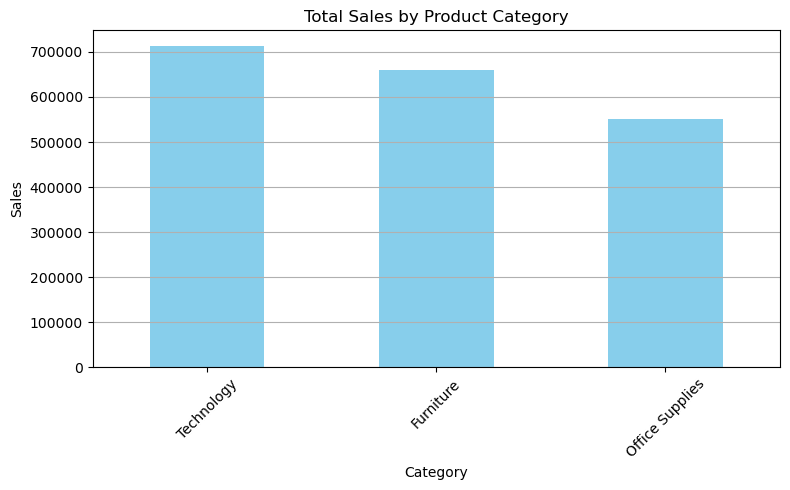

In [23]:
import matplotlib.pyplot as plt

sales_by_category.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Total Sales by Product Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [24]:
#convert order date to date time
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [25]:
#creat month-year column
df['Month'] = df['Order Date'].dt.to_period('M')


In [26]:
#Group by month
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()


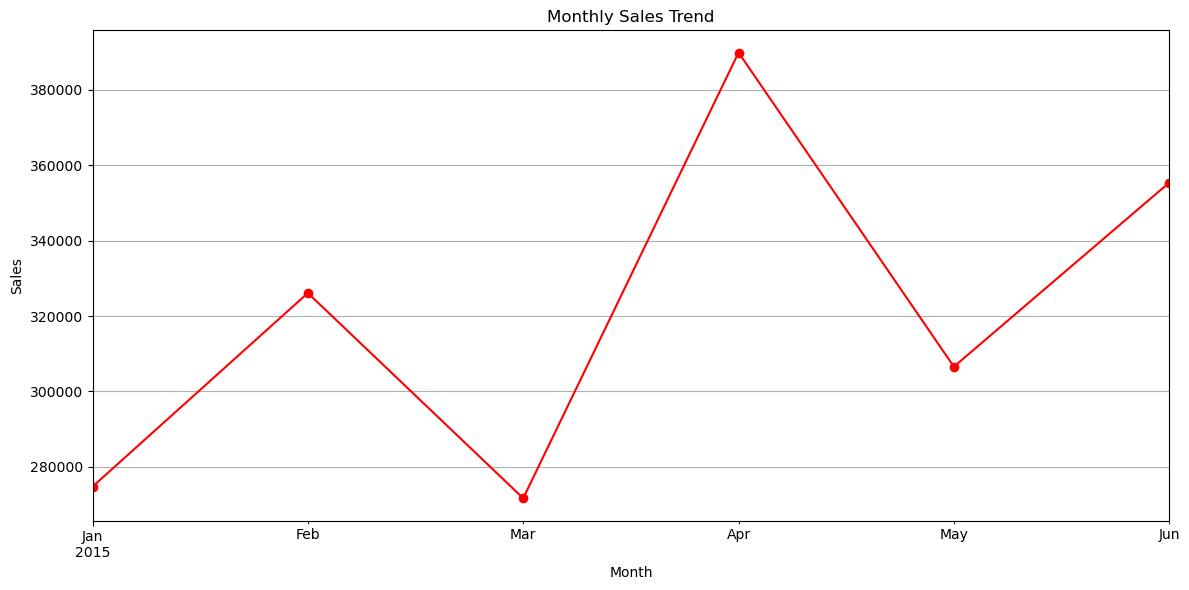

In [28]:
#monthly sales
monthly_sales.plot(kind='line', figsize=(12,6), marker='o', color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


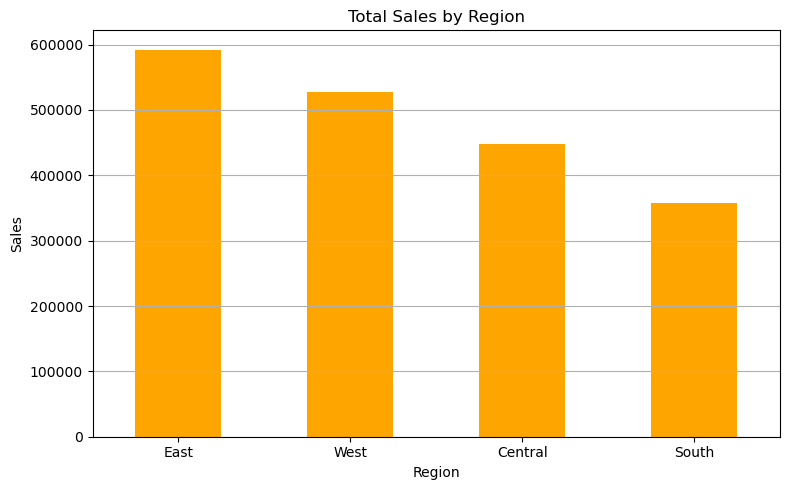

In [30]:
#Region wise sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='orange', figsize=(8,5))
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\shlok\AppData\Local\Temp\ipykernel_4656\3470339209.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


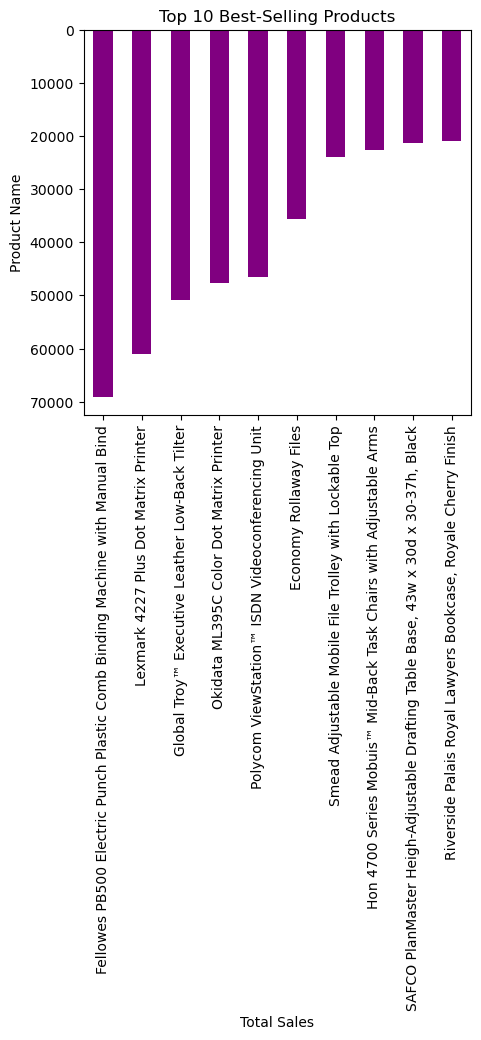

In [32]:
#Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(5,5), color='purple')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


In [ ]:
🔍 Key Insights
📈 Technology is the highest-selling category overall.

🌍 Western region brings in the most revenue.

🗓️ November and December show sales spikes — likely seasonal trends.

👑 Top-selling products included in the above bar graph.

🧮 Most sales are concentrated among a few products — good for targeted marketing.

💰 Despite strong sales, profit margins vary across categories.